In [0]:
#https://medium.com/supervised-learning-on-python-predicting-customer/supervised-learning-on-python-predicting-customer-churn-1-5d661b07715f

import numpy as np
import pandas as pd
import copy
%matplotlib inline


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium as f
from IPython.display import HTML


In [0]:
#sns.set_style('whitegrid')
#import chart_studio
#import chart_studio.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected = True)

In [0]:
import os
print(os.listdir("/content"))

['.config', 'latest_for_testing.csv', 'sample_data']


In [0]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [0]:
pip install imblearn

In [0]:
from rpy2.robjects import r
import rpy2.robjects.pandas2ri as pandas2ri

In [0]:
#import the data
data_test = pd.read_csv('latest_for_testing.csv', delimiter=';', skiprows=0, low_memory=False)

In [0]:
data_test.head()

,user_settings_crypto_unlocked,plan,num_contacts,age,account_duration,mean_period_within_transactions,max_period_within_transactions,unique_days_of_transactions,std_of_transactions,var_of_transactions,total_amount_of_transactions,amount_of_transactions_out,min_usd_out,max_usd_out,mean_usd_out,sum_usd_out,amount_of_transactions_in,min_usd_in,max_usd_in,mean_usd_in,sum_usd_in,count_type_atm,count_type_card_payment,count_type_exchange,count_type_fee,count_type_tax,count_type_transfer_out,count_type_card_refund,count_type_cashback,count_type_refund,count_type_topup,count_type_transfer_in,last_transaction,first_transaction,engagement_duration,days_passed_for_first_transaction,transactions_frequency,email_engagement_split_bill_restaurant,email_invest_in_gold,email_lost_card_order,email_made_money_request_not_split_bill,email_no_initial_card_order,email_no_initial_card_use,email_onboarding_tips_activated_users,email_promo,email_promo_card_order,email_welcome_back,push_black_friday,push_blue_tuesday,push_joining_anniversary,push_lost_card_order,push_promo,push_reengagement_active_funds,push_silver_engagement_fees_saved,push_silver_engagement_inactive_card,sms_metal_reserve_plan,sms_reengagement_active_funds,brands_Android,brands_Apple
0,0,0,3,27,263,1.522013,18.0,160.0,64.059353,4103.600767,520.0,357.0,0.58,510.64,10.167367,3629.75,163.0,8.51,510.64,20.216748,3295.33,0.0,333.0,5.0,0.0,0.0,19.0,1.0,0.0,0.0,158.0,4.0,21.0,263.0,243.0,0.0,2.139918,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
1,1,0,75,34,505,6.676471,79.0,69.0,104.200464,10857.736728,133.0,106.0,0.94,851.06,61.226698,6490.03,27.0,1.70,851.06,239.463333,6465.51,4.0,78.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,24.0,3.0,27.0,481.0,455.0,24.0,0.292308,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0,1
2,0,0,71,23,183,2.238095,24.0,64.0,25.899183,670.767664,268.0,225.0,0.04,194.38,6.901511,1552.84,43.0,4.26,97.87,27.233953,1171.06,0.0,97.0,0.0,0.0,0.0,128.0,0.0,0.0,0.0,37.0,6.0,42.0,183.0,142.0,0.0,1.887324,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1
3,0,0,219,38,468,5.544304,104.0,80.0,104.476260,10915.289003,140.0,126.0,1.87,263.83,27.991667,3526.95,14.0,42.55,510.64,248.024286,3472.34,0.0,120.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,13.0,1.0,22.0,460.0,439.0,8.0,0.318907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0,1
4,0,0,0,27,508,9.484848,71.0,34.0,66.093345,4368.330204,50.0,41.0,1.50,92.00,13.691951,561.37,9.0,10.00,200.00,46.673333,420.06,0.0,37.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,136.0,449.0,314.0,59.0,0.159236,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0,1


In [0]:
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15544 entries, 0 to 15543
Data columns (total 59 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   user_settings_crypto_unlocked            15544 non-null  int64  
 1   plan                                     15544 non-null  int64  
 2   num_contacts                             15544 non-null  int64  
 3   age                                      15544 non-null  int64  
 4   account_duration                         15544 non-null  int64  
 5   mean_period_within_transactions          15544 non-null  float64
 6   max_period_within_transactions           15544 non-null  float64
 7   unique_days_of_transactions              15544 non-null  float64
 8   std_of_transactions                      15544 non-null  float64
 9   var_of_transactions                      15544 non-null  float64
 10  total_amount_of_transactions             15544

In [0]:
print("Shape:",data_test.shape)
print(data_test.describe())

Shape: (15544, 59)
       user_settings_crypto_unlocked  ...  brands_Apple
count                   15544.000000  ...  15544.000000
mean                        0.182385  ...      0.496912
std                         0.386174  ...      0.500007
min                         0.000000  ...      0.000000
25%                         0.000000  ...      0.000000
50%                         0.000000  ...      0.000000
75%                         0.000000  ...      1.000000
max                         1.000000  ...      1.000000

[8 rows x 59 columns]


In [0]:
#Check null value(if any)
data_test.isnull().any()

user_settings_crypto_unlocked              False
plan                                       False
num_contacts                               False
age                                        False
account_duration                           False
mean_period_within_transactions            False
max_period_within_transactions             False
unique_days_of_transactions                False
std_of_transactions                        False
var_of_transactions                        False
total_amount_of_transactions               False
amount_of_transactions_out                 False
min_usd_out                                False
max_usd_out                                False
mean_usd_out                               False
sum_usd_out                                False
amount_of_transactions_in                  False
min_usd_in                                 False
max_usd_in                                 False
mean_usd_in                                False
sum_usd_in          

In [0]:
#https://www.kaggle.com/rockbt1189/customer-segmentation-eda-visualization-analysis
#Divide age into groups
data_test["Age_Group"] = np.where(data_test.age<25,"Age below 25 year",(np.where(data_test.age<35, "Age 25 to 34 year" ,
                                                                   (np.where(data_test.age<45, "Age 35 to 44 year" ,
                                                                             (np.where(data_test.age<55, "Age 45 to 54 year" ,"Age more then 55 year")))))))

data_test.head()

,user_settings_crypto_unlocked,plan,num_contacts,age,account_duration,mean_period_within_transactions,max_period_within_transactions,unique_days_of_transactions,std_of_transactions,var_of_transactions,total_amount_of_transactions,amount_of_transactions_out,min_usd_out,max_usd_out,mean_usd_out,sum_usd_out,amount_of_transactions_in,min_usd_in,max_usd_in,mean_usd_in,sum_usd_in,count_type_atm,count_type_card_payment,count_type_exchange,count_type_fee,count_type_tax,count_type_transfer_out,count_type_card_refund,count_type_cashback,count_type_refund,count_type_topup,count_type_transfer_in,last_transaction,first_transaction,engagement_duration,days_passed_for_first_transaction,transactions_frequency,email_engagement_split_bill_restaurant,email_invest_in_gold,email_lost_card_order,email_made_money_request_not_split_bill,email_no_initial_card_order,email_no_initial_card_use,email_onboarding_tips_activated_users,email_promo,email_promo_card_order,email_welcome_back,push_black_friday,push_blue_tuesday,push_joining_anniversary,push_lost_card_order,push_promo,push_reengagement_active_funds,push_silver_engagement_fees_saved,push_silver_engagement_inactive_card,sms_metal_reserve_plan,sms_reengagement_active_funds,brands_Android,brands_Apple,Age_Group
0,0,0,3,27,263,1.522013,18.0,160.0,64.059353,4103.600767,520.0,357.0,0.58,510.64,10.167367,3629.75,163.0,8.51,510.64,20.216748,3295.33,0.0,333.0,5.0,0.0,0.0,19.0,1.0,0.0,0.0,158.0,4.0,21.0,263.0,243.0,0.0,2.139918,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,Age 25 to 34 year
1,1,0,75,34,505,6.676471,79.0,69.0,104.200464,10857.736728,133.0,106.0,0.94,851.06,61.226698,6490.03,27.0,1.70,851.06,239.463333,6465.51,4.0,78.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,24.0,3.0,27.0,481.0,455.0,24.0,0.292308,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0,1,Age 25 to 34 year
2,0,0,71,23,183,2.238095,24.0,64.0,25.899183,670.767664,268.0,225.0,0.04,194.38,6.901511,1552.84,43.0,4.26,97.87,27.233953,1171.06,0.0,97.0,0.0,0.0,0.0,128.0,0.0,0.0,0.0,37.0,6.0,42.0,183.0,142.0,0.0,1.887324,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1,Age below 25 year
3,0,0,219,38,468,5.544304,104.0,80.0,104.476260,10915.289003,140.0,126.0,1.87,263.83,27.991667,3526.95,14.0,42.55,510.64,248.024286,3472.34,0.0,120.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,13.0,1.0,22.0,460.0,439.0,8.0,0.318907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0,1,Age 35 to 44 year
4,0,0,0,27,508,9.484848,71.0,34.0,66.093345,4368.330204,50.0,41.0,1.50,92.00,13.691951,561.37,9.0,10.00,200.00,46.673333,420.06,0.0,37.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,136.0,449.0,314.0,59.0,0.159236,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0,1,Age 25 to 34 year


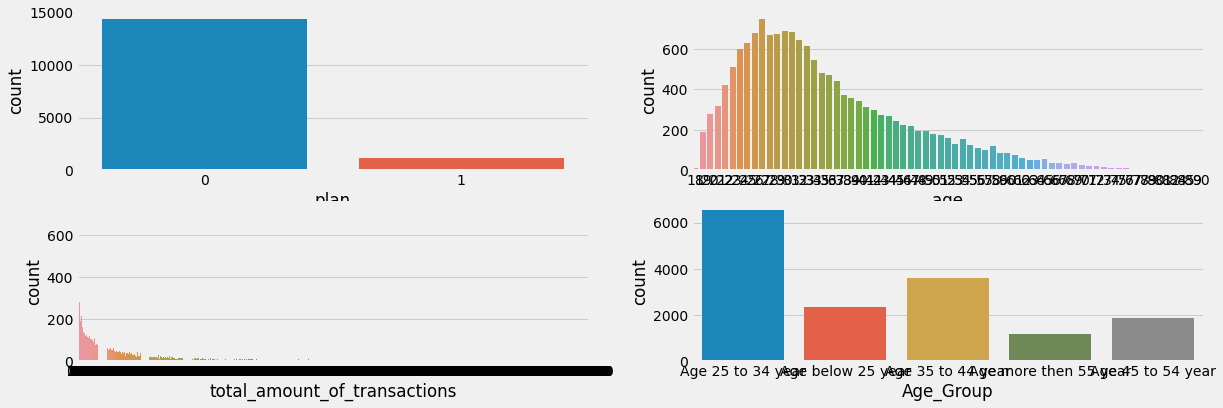

In [0]:
#data visualization
plt.rcParams["figure.figsize"] =(18,6)

plt.subplot(221)
sns.countplot(data_test.plan)

plt.subplot(222)
sns.countplot(data_test.age)

plt.subplot(223)
sns.countplot(data_test["total_amount_of_transactions"])

plt.subplot(224)
sns.countplot(data_test["Age_Group"])

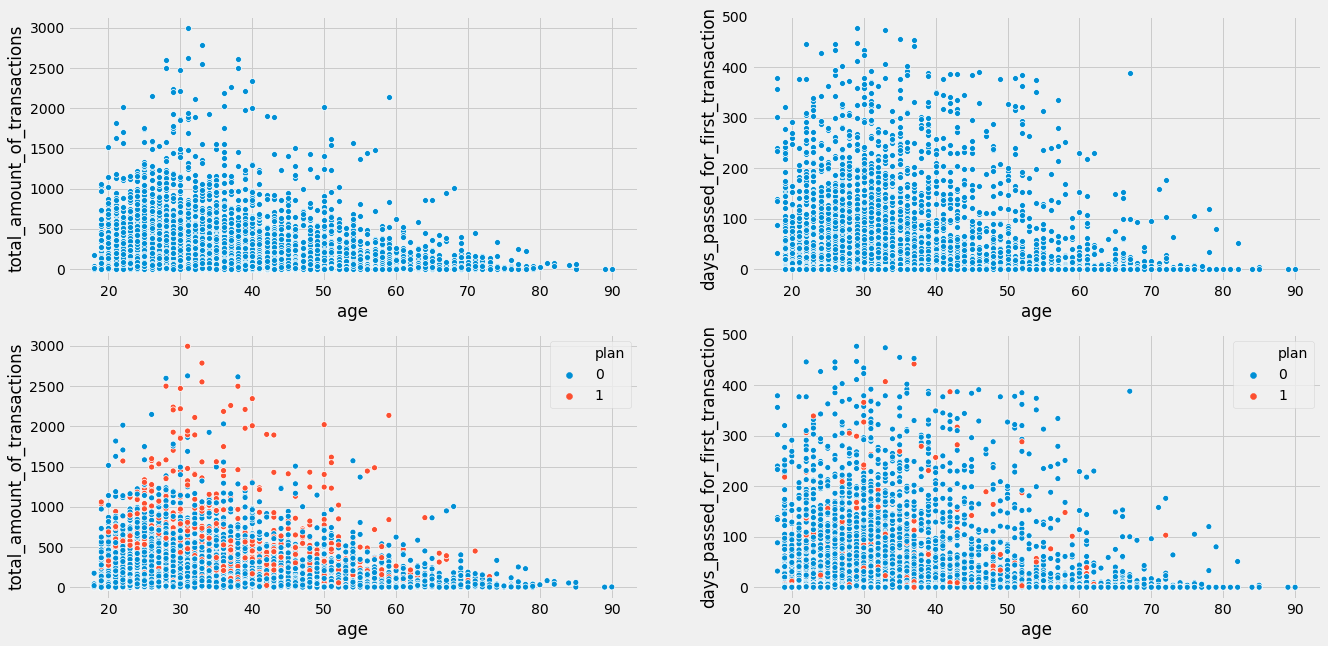

In [0]:
plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(221)
sns.scatterplot(x="age",y="total_amount_of_transactions",data=data_test)

plt.subplot(222)
sns.scatterplot(x="age",y="days_passed_for_first_transaction",data=data_test)

plt.subplot(223)
sns.scatterplot(x="age",y="total_amount_of_transactions",data=data_test,hue="plan")

plt.subplot(224)
sns.scatterplot(x="age",y="days_passed_for_first_transaction",data=data_test,hue="plan")



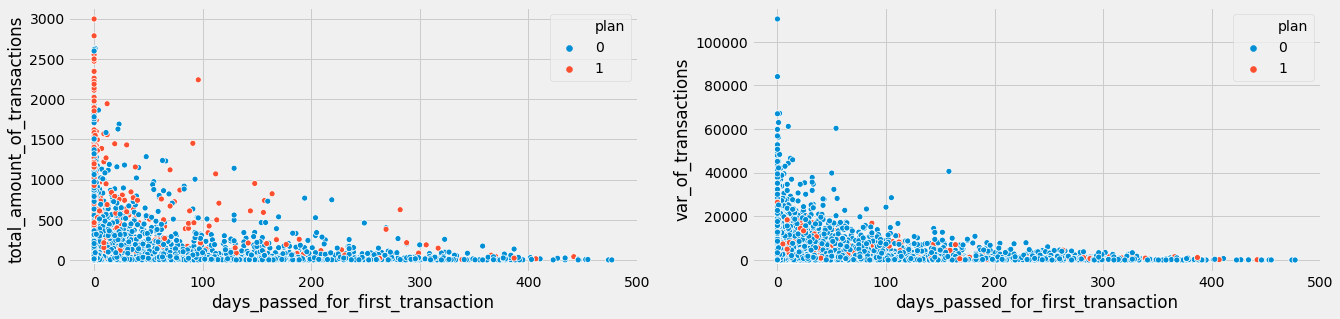

In [0]:
plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(221)
sns.scatterplot(x="days_passed_for_first_transaction",y="total_amount_of_transactions",data=data_test,hue="plan")

plt.subplot(222)
sns.scatterplot(x="days_passed_for_first_transaction",y="var_of_transactions",data=data_test,hue="plan")

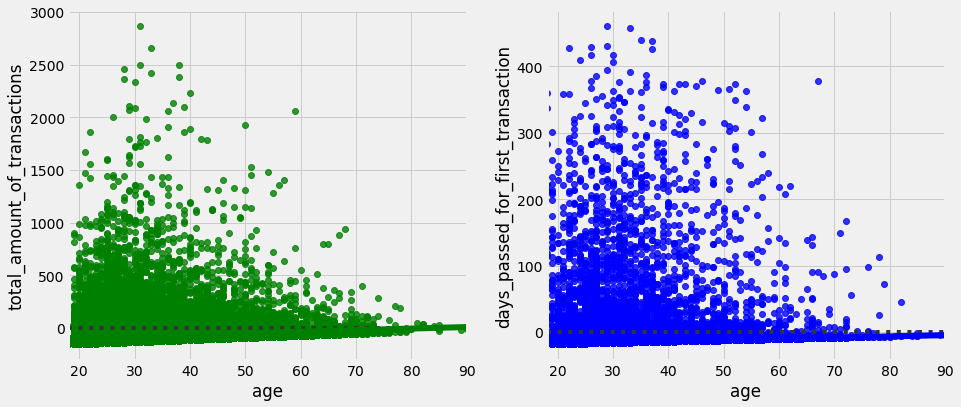

In [0]:
#residplot
plt.rcParams['figure.figsize'] = (14,6)

plt.subplot(121)
sns.residplot(y="total_amount_of_transactions", x="age",data=data_test, lowess=True, color="g")

plt.subplot(122)
sns.residplot(y="days_passed_for_first_transaction", x="age",data=data_test, lowess=True, color="b")

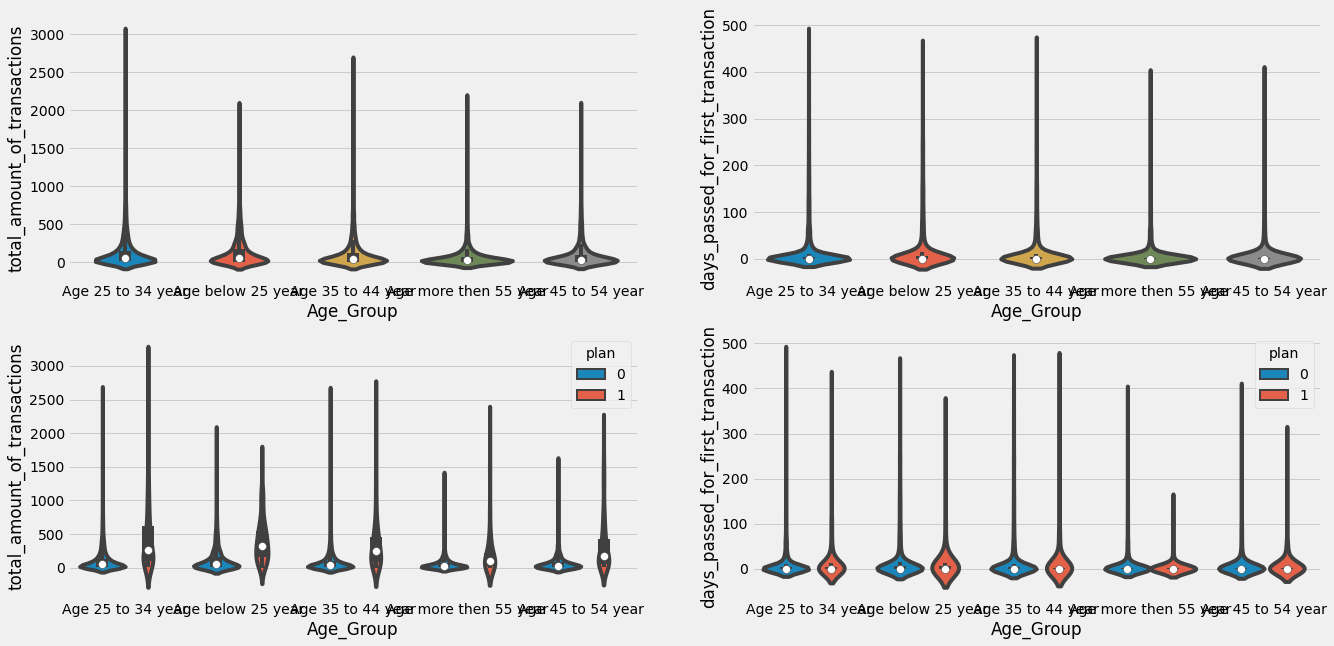

In [0]:
plt.rcParams['figure.figsize'] = (20,10)

plt.subplot(221)
sns.violinplot(x="Age_Group",y="total_amount_of_transactions",data=data_test)

plt.subplot(222)
sns.violinplot(x="Age_Group",y="days_passed_for_first_transaction",data=data_test)

plt.subplot(223)
sns.violinplot(x="Age_Group",y="total_amount_of_transactions",data=data_test,hue="plan")

plt.subplot(224)
sns.violinplot(x="Age_Group",y="days_passed_for_first_transaction",data=data_test,hue="plan")

In [0]:
# Check how Age wise Data is distributed
plt.rcParams['figure.figsize'] = (20,10)

plt.subplot(221)
sns.boxplot(x="Age_Group",y="total_amount_of_transactions",data=data_test)
sns.swarmplot(x="Age_Group", y="total_amount_of_transactions", data=data_test, color=".25")

plt.subplot(222)
sns.boxplot(x="Age_Group",y="mean_usd_in",data=data_test)
sns.swarmplot(x="Age_Group", y="mean_usd_in", data=data_test, color=".25")

plt.subplot(223)
sns.boxplot(x="Age_Group",y="total_amount_of_transactions",data=data_test,hue="plan")

plt.subplot(224)
sns.boxplot(x="Age_Group",y="mean_usd_in",data=data_test,hue="plan")

In [0]:
#corelation matrix

corr = data_test.drop("mean_usd_in",axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 10))
cmap = sns.diverging_palette(30, 0, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,square=True, linewidths=.5,linecolor='yellow', cbar_kws={"shrink": .4})
# there is Negative weak corelatin between Age and Spending

In [0]:
data_test.boxplot('total_amount_of_transactions','plan',rot = 30,figsize=(5,6))

In [0]:
data_test.boxplot('email_promo','plan',rot = 30,figsize=(5,6))

In [0]:
data_test.boxplot('brands_Apple','plan',rot=30,figsize=(5,6))

In [0]:
data_test.boxplot('transactions_frequency','plan',rot=30,figsize=(5,6))

In [0]:
sns.relplot(x="transactions_frequency",y ="duration", hue = "plan",data=data_test)

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='plan',data=data_test)

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='plan',hue='email_promo',data=data_test,palette='rainbow')